In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
from sklearn.preprocessing import StandardScaler

In [2]:
data = np.array(pd.read_csv('~/DataSet3/1.csv'))

In [12]:
data1=data[:,1:4]
labels = data[:,-1]
labels

array([1., 1., 1., ..., 7., 7., 0.])

**Scalling data to normalize the effect of each dimention and also reduce effect of outliers**

In [4]:
scaler = StandardScaler()
scaler.fit(data1)
sample_transformed = scaler.transform(data1)
print(scaler.mean_)

**Elbow implementation with Euclidean Distance and validation matrix**

In [7]:
distortion_euclidean=[]
slope=[]
K = range(1,10)
for k in K :
    kmeansModel = KMeans(n_clusters=k)
    kmeansModel.fit_predict(sample_transformed)
    #Calculate pairwise distance between centers and each sample and then finding minnimum of that
    distortion_euclidean.append(sum(np.min(cdist(sample_transformed,kmeansModel.cluster_centers_,'euclidean'),axis=1)))
    #Calculate slope of each line
    if k>1:
        s= (distortion_euclidean[-1]-distortion_euclidean[-2])
        slope.append([k,s])

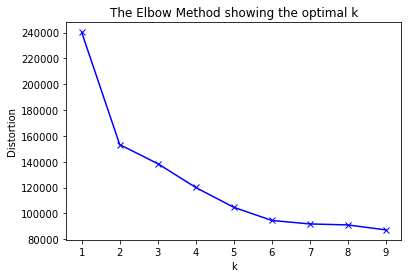

In [8]:
plt.plot(K,distortion_euclidean,'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [9]:
slope

[[2, -87037.64171110248],
 [3, -14748.66336326691],
 [4, -18467.73186604961],
 [5, -15357.552588017395],
 [6, -10187.387678655912],
 [7, -2679.2951011066907],
 [8, -784.0283315593697],
 [9, -3846.92792289739]]

In [10]:
#chose the value after which there is a reduction in gain(rather loss)
for a in range(0,7):
    change_slope=(slope[a])[-1] - (slope[a+1])[-1]
    if change_slope > 0:
        print('Optimal Number of Clusters = '+str((slope[a][0])-1))

Optimal Number of Clusters = 2
Optimal Number of Clusters = 7
